When your cursor is in a cell, hit "Shift+Enter" to run the code in that cell.
The code in the next cell below defines all of the major Metropolis Monte Carlo
components for the example in class on 01/27/2017. I have included example cells 
that call the run(kT,steps) function defined in the first cell, which performs a 
simulationat a specified kT for a number of steps.

Note: if you change code in the first cell, you'll need to "Shift+Enter" to 
communicate those changes to the Python kernel, and then you'll need to 
"Shift+Enter" in any cells where you'd like to see those changes propagated.
If you think you've messed everything up, download this file again and upload it to
codelab.boisestate.edu

I have also included some example plotting code in the bottom cell.

Here we have a model of five "particles" in a volume with ten "sites". A '1' in 
our system array indicates there's a particle there, and a '0' indicates the site
is empty. These particles are "attractive", in the sense that there is a negative
potential energy (-1 units of kT) associated with two particles being in adjacent
sites. 

HW Due Tuesday 01/31/2017 at 9:00am. Please save and hand in your updates to this 
iPython notebook, saved with your name "e.g., hw-mc1-jankowski.ipynb", uploaded
to blackboard.

    0.a How many distinguishable microstates does this system have?
        0.b What if there were twenty sites for the five "particles"?
        0.c What if there were fifteen particles and twenty sites?
    1. Using kT=1, experiment with different numbers of timesteps:
        1.a What is the average system energy at this temperature?
        1.b How does the standard deviation in the energy scale with the number of runs?
        1.c What is a practical upper limit for how long we should run a simulation?
    2. How does the average system of energy vary with T?
        2.a. Plot <E> for temperatures varying between 0.01 and 2.0
        2.b. Do any "interesting" temperatures stand out from these data? If so, why?
    3.a What is the most likely configuration at T=0.05?
    3.b and at T=3.0?
    4. How large of a system can you "equilibrate" with this code?
    5. What factors matter for how long a system takes to equilibrate?
    6. Is this code correct? If not, include your improvements in a new cell.


In [1]:
import numpy

def energy(s):
    e = 0
    for i in range(len(s)-1):
        if s[i]==1:
            if s[i+1]==1:
                e-=1       #-1 energy for each pair of adjacent 1's
    return e

def trial_move(s): #randomly swap two positions in the system
    temp = numpy.copy(s)
    p1 = numpy.random.randint(0,len(s))
    p2 = numpy.random.randint(0,len(s))
    temp[p2], temp[p1] = temp[p1],temp[p2]
    return temp

def accept(de,kT): #implement detailed balance
    if numpy.exp(-de/kT) > numpy.random.rand():
        return True
    return False
        
def run(kT,steps): #specify temperature, number of steps to perform simulation
    system = numpy.array([1,0]*5) #initialize 1's so they're not touching
    e = numpy.array( int(steps)*[0])  #store energies in here
    for trials in range(int(steps)):
        trial = trial_move(system)
        de = energy(trial)-energy(system)
        if accept(de,kT):
            system = numpy.copy(trial)
        e[trials] = energy(system)
    print(system)
    return kT,e.mean(), e.std() #Return the temperature, average energy, and standard deviation

In [2]:
run(.5,1e5)

[0 1 0 0 0 0 1 1 1 1]


(0.5, -3.2174900000000002, 0.6985900800183179)

In [3]:
run(1.1,1e5)

[0 1 1 0 1 1 1 0 0 0]


(1.1, -2.5990899999999999, 0.78924088331763453)

[0 0 1 0 0 1 1 1 1 0]
[0 1 1 0 0 0 0 1 1 1]
[1 0 1 0 1 0 0 1 1 0]


/home/evanmiller/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


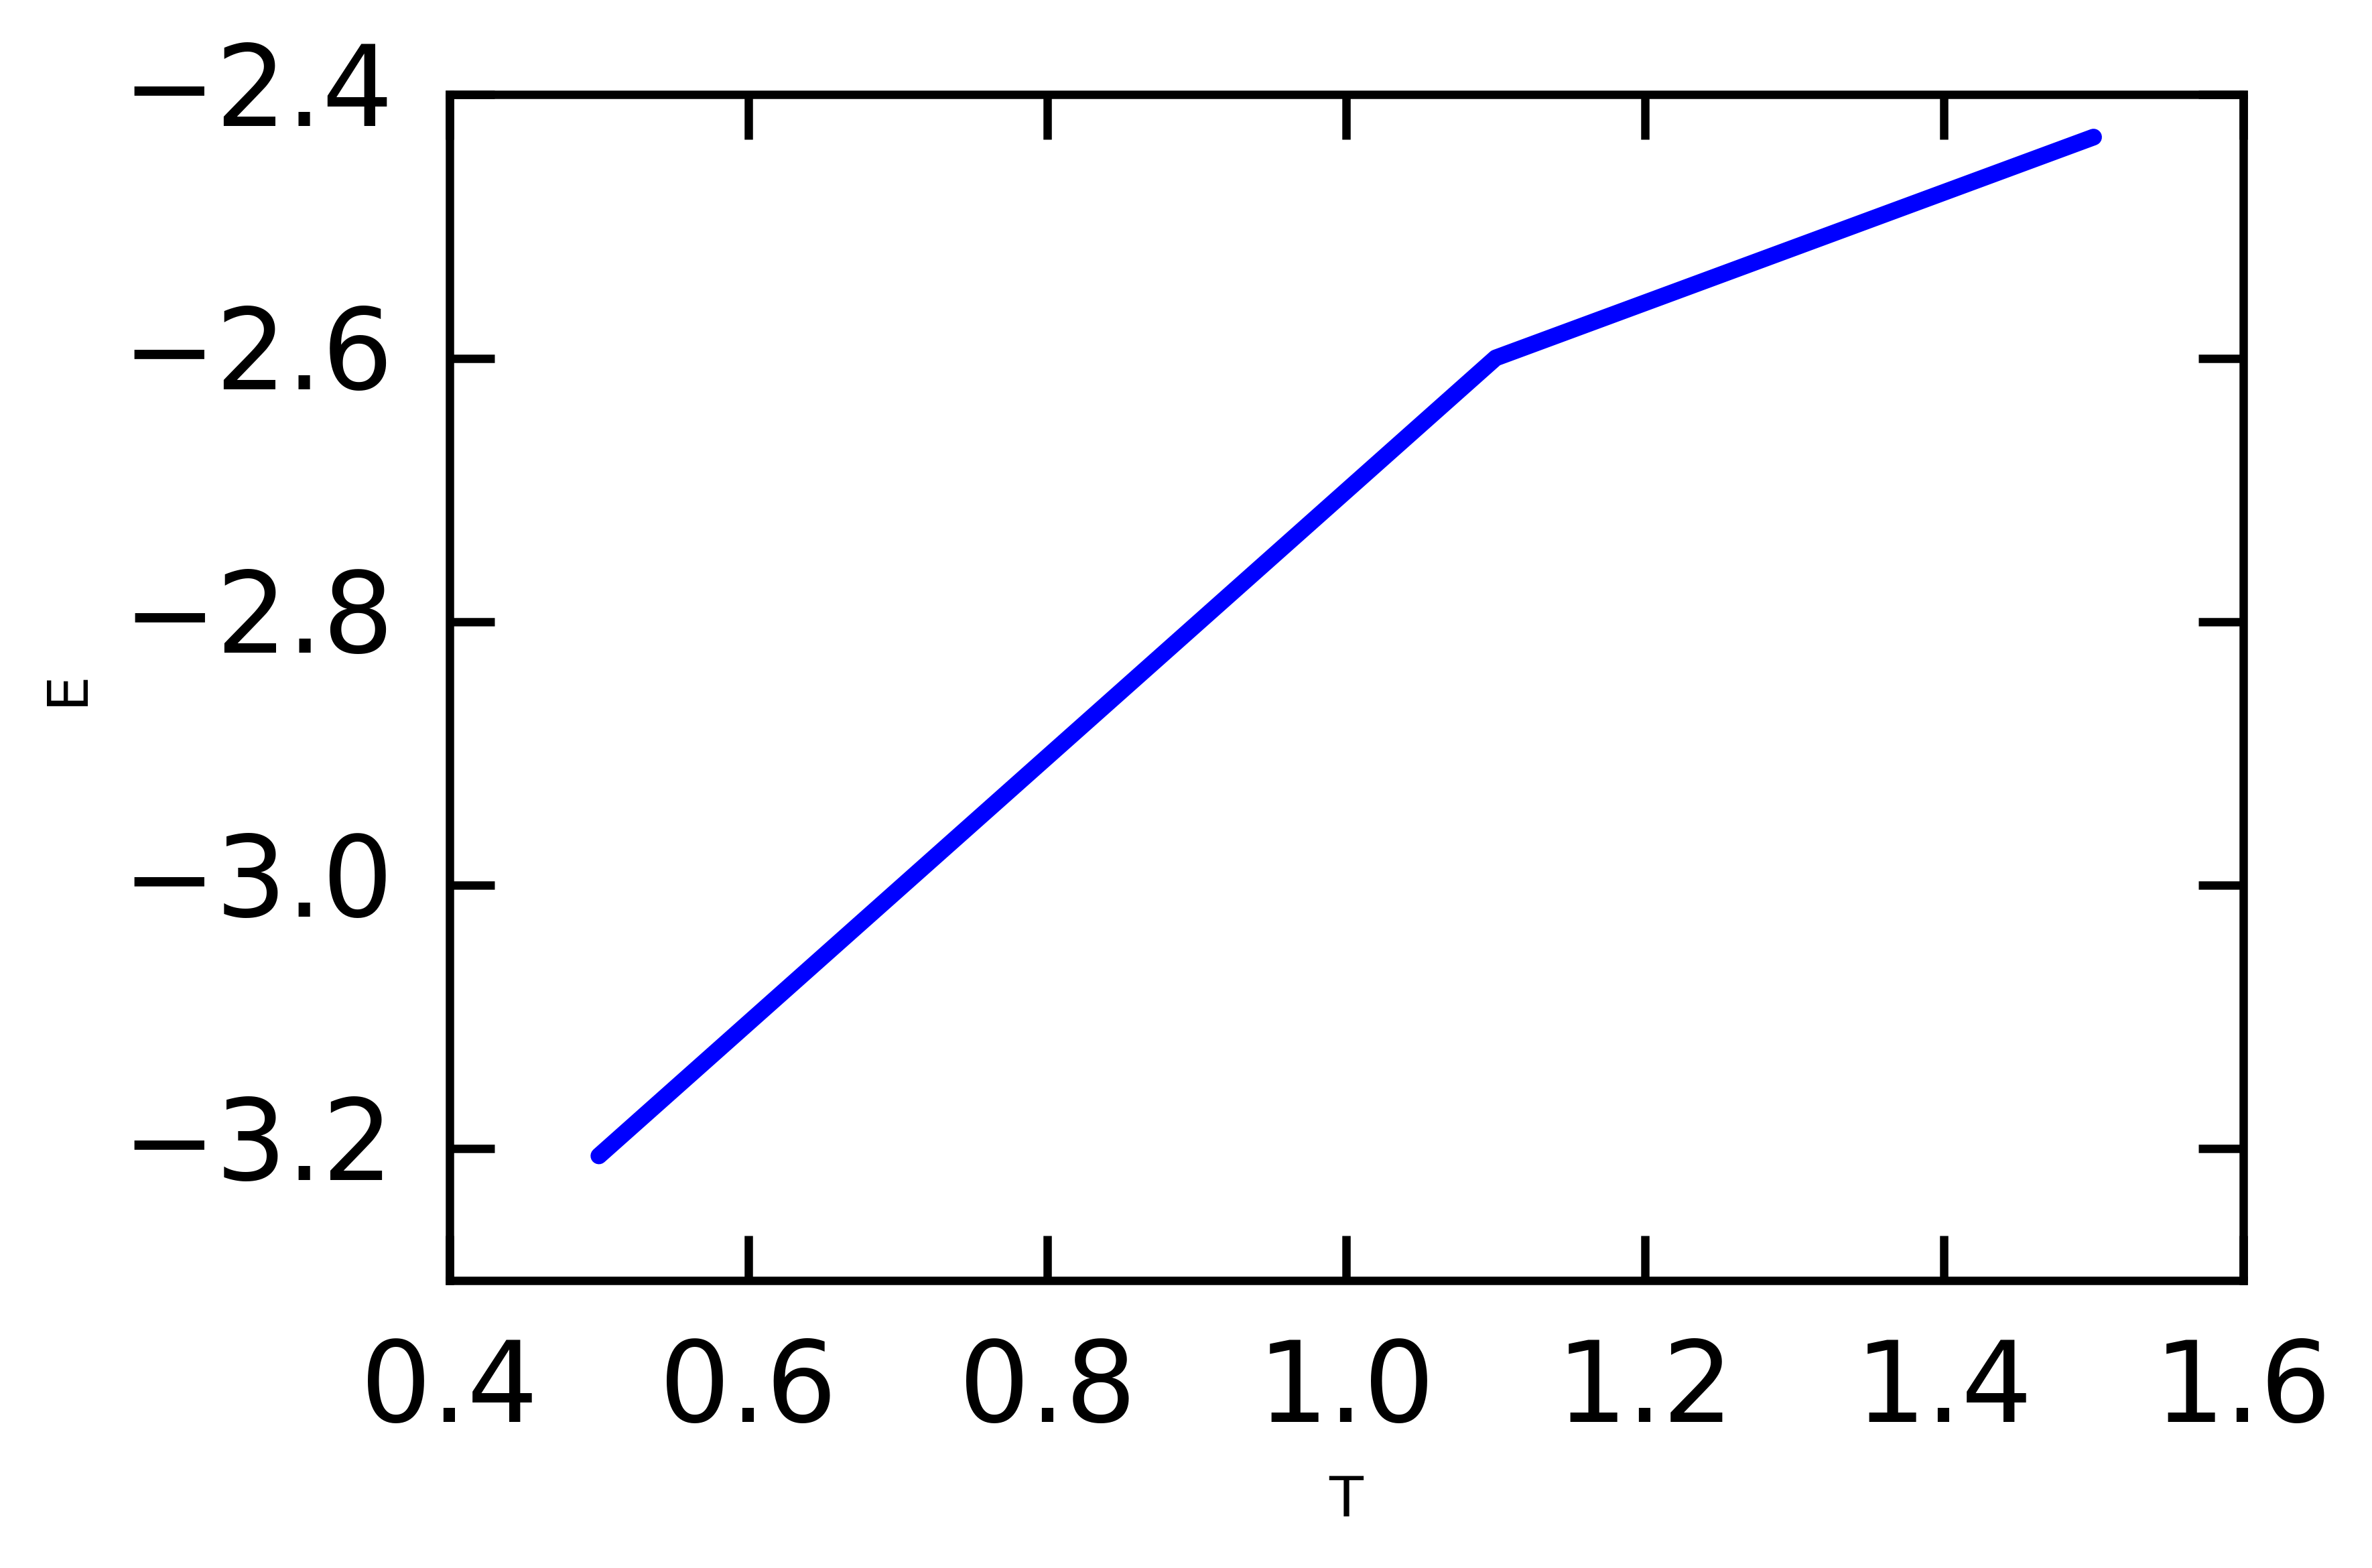

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
Temperatures = [0.5,1.1,1.5]
avgE = []
for T in Temperatures:
    t,a,s = run(T,1e5)
    avgE.append(a)
plt.xlabel("T")
plt.ylabel("E")
plt.plot(Temperatures,avgE)
#plt.show() # If your plot doesn't appear after a little while (check if a window has appeared behind this) then you might try uncommenting this line and running again

**0a**

Because there are five particles that can exist in an up or down position and order doesn't matter, the number of states that occur can be calculated with: 10!/(5!*5!)= 252.

**0b**

If there are five particles and 20 positions we use the equation 20!/15!5! = 15504.

**0c**

If there are 15 particles and 20 positions it is the same as 0b: 20!/5!15! = 15504.

**1**

We want to keep kT constant at kT = 1 and change the number of timesteps.

In [5]:
run(1.0,1e6)

[1 1 1 0 1 0 1 0 0 0]


(1.0, -2.6508530000000001, 0.78822292049330822)

The average energy is -2.65

In [6]:
timesteps = [5e2, 1e3, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6, 5e6]
avgE = []
aveSD = []
for T in timesteps:
    t,a,s = run(1.0, T)
    avgE.append(a)
    aveSD.append(s)

[0 0 1 1 1 0 1 0 1 0]
[0 0 1 1 1 1 1 0 0 0]
[0 1 1 1 1 1 0 0 0 0]
[1 0 1 1 0 0 0 0 1 1]
[0 0 1 1 1 0 1 1 0 0]
[0 1 1 1 0 1 0 0 1 0]
[0 0 0 0 1 1 0 1 1 1]
[0 0 1 0 1 1 1 0 1 0]
[1 1 0 1 1 1 0 0 0 0]


In [7]:
plt.xlabel("timestep")
plt.xscale('log')
plt.ylabel("Average E")
plt.plot(timesteps,avgE)

/home/evanmiller/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/evanmiller/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/evanmiller/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [8]:
plt.xlabel("timestep")
plt.ylabel("E deviation")
plt.xscale('log')
plt.plot(timesteps,aveSD)

/home/evanmiller/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['cursive'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/evanmiller/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/evanmiller/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


**1b** 

The deviation in the energy varies as the number of timesteps decreases before becoming mostly constant around 1e5 timesteps. 

**1c**

It appears the average energy stabilizes around 1e5 timesteps. The deviation in the energy also stabilizes about this point. This seems like 1e5 timesteps is the lower limit of how many timesteps to conduct. Going above this to 1e6 seems like a good compromise in allowing for enough timesteps, but minimizing the run time.

**2**

In [9]:
import numpy
Temperatures = numpy.linspace(0.01, 2.2, num = 10)
avgE = []
for T in Temperatures:
    t,a,s = run(T,5e5)
    avgE.append(a)

[0 1 1 1 1 1 0 0 0 0]
[0 1 1 1 1 1 0 0 0 0]
[0 0 0 1 1 0 1 1 1 0]
[0 0 0 1 1 1 1 1 0 0]
[1 0 0 1 1 0 1 0 0 1]
[1 0 0 0 1 1 1 0 0 1]
[1 1 0 1 0 1 0 0 0 1]
[1 0 0 0 0 1 0 1 1 1]
[1 1 0 0 0 1 0 1 1 0]
[0 1 0 0 1 1 0 1 1 0]


In [10]:
plt.xlabel("T")
plt.ylabel("E")
plt.plot(Temperatures,avgE)

/home/evanmiller/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


As the temperature increases the energy also increases, however the energy curve looks somewhat logarithmic. 
There is a change in how the energy increases around 0.3. Here the increase in energy changes from a linear relationship to a logarithmic one. 

In [11]:
run(3.0,1e4)

[0 1 0 1 1 1 1 0 0 0]


(3.0, -2.2448999999999999, 0.79794986684628244)

**3**

The most common conformation at T = 0.05 is having the five 1s next to eachother.

When the temperature is increased to T = 3 it appears the configurations are random. After multiple runs, sometimes the particles are together and other times they are not, however there is no obvious pattern in the arangement. 

In [63]:
import time

def new_run(kT,steps, size): #specify temperature, number of steps to perform simulation   
    system = numpy.array([1,0]*int(size)) #initialize 1's so they're not touching
    e = numpy.array( int(steps)*[0])  #store energies in here
    clock = numpy.array( int(steps)*[0.0])
    for trials in range(int(steps)):
        start_time = time.time()
        trial = trial_move(system)
        de = energy(trial)-energy(system)
        if accept(de,kT):
            system = numpy.copy(trial)
        e[trials] = energy(system)
        end_time = time.time()
        dt = end_time-start_time
        clock[trials] = dt
    return kT,e.mean(), e.std(), e, clock.mean() #Return the temperature, average energy, and standard deviation

In [64]:
kT, mean, std, e, clock = new_run(1.0, 1e1, 1e1)

In [73]:
size = [10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
avgt = []
for T in size:
    t,a,s,e,clock = new_run(1.0, 1e1, T)
    avgt.append(clock)
for t in avgt:
    print("{:.2e}".format(t))

6.90e-05
2.97e-04
2.14e-03
1.86e-02
1.75e-01
1.84e+00
1.73e+01


/home/evanmiller/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


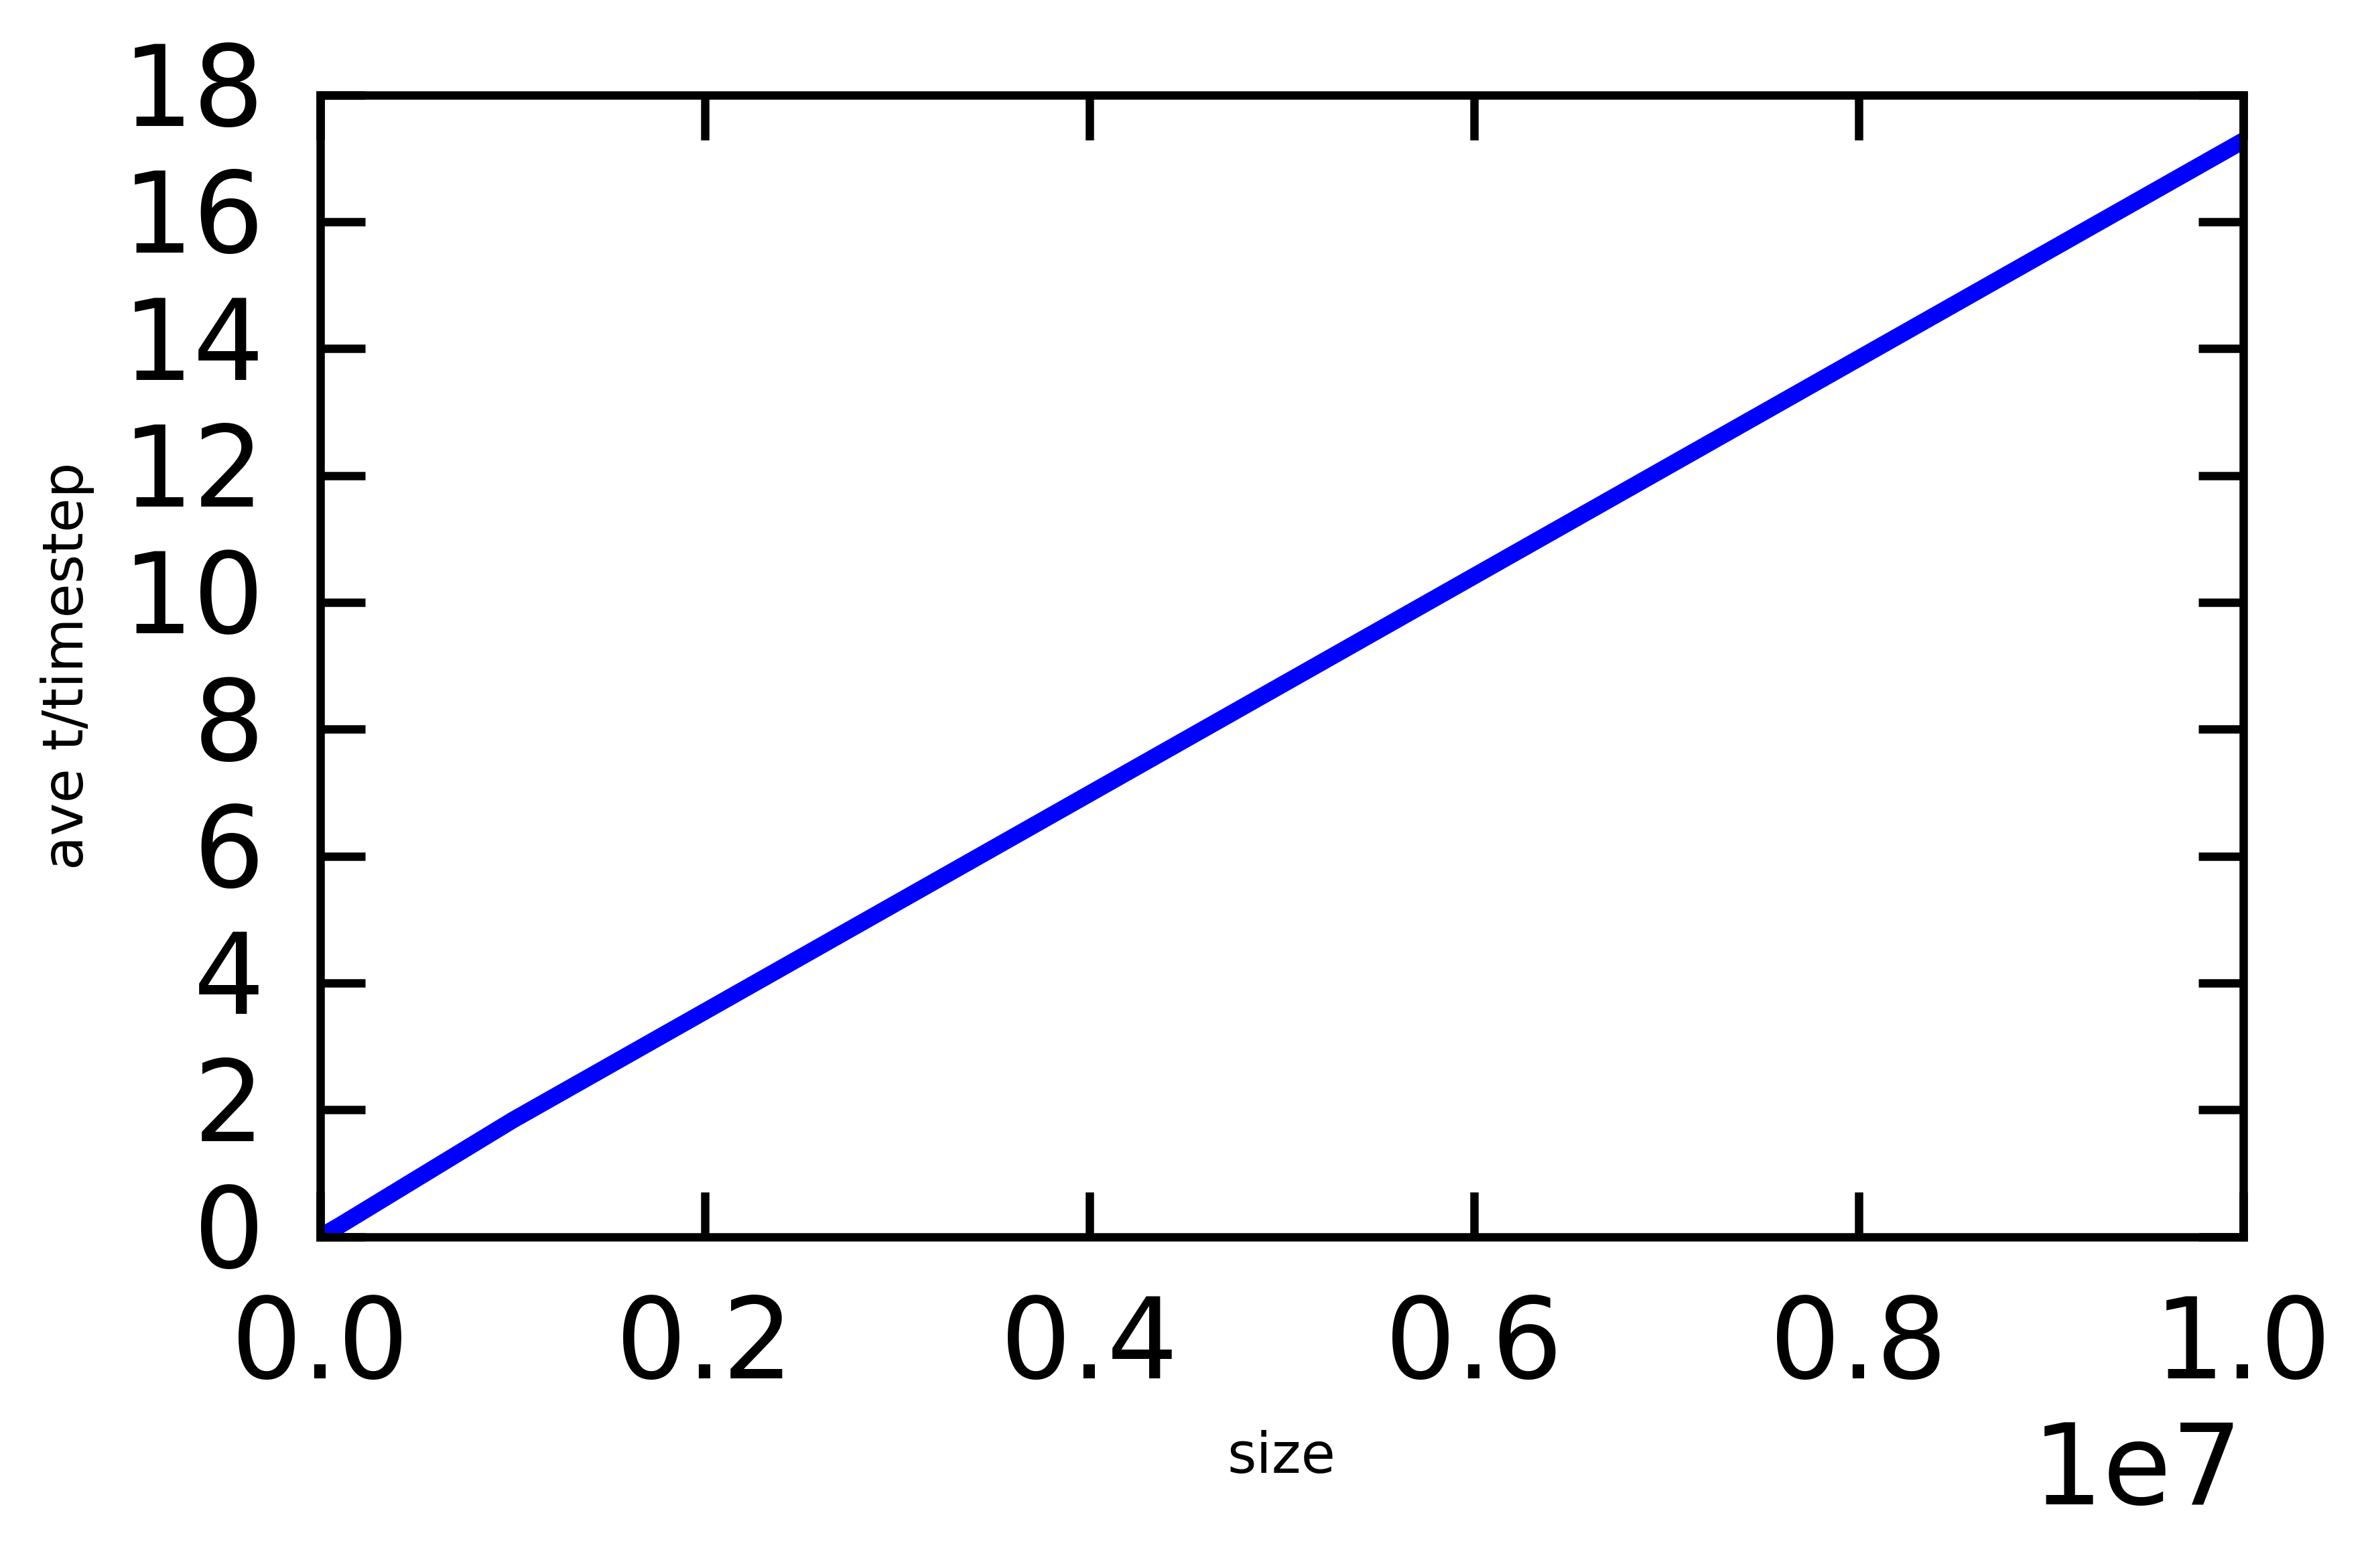

In [74]:
plt.xlabel("size")
plt.ylabel("ave t/timestep")
plt.ticklabel_format(style='sci', axis = 'x', scilimits=(0,0))
plt.plot(size, avgt)

**4**

The time to calculate a step scales linearly with the size of the system. We also saw earlier that we need atleast 1e5 timesteps to reach equilibrium with a system size of 10. If we assume that the number of timesteps to reach equilibrium doesn't change with system size (which is a rough assumption since the larger the system the more timesteps would be required) then system of 1e3 positions would take about 5 minutes to calculate and a system of 1e5 positions would take about 5 hours. Depending on how long one wants to sit and wait for the system to come to equilibrium any systems larger than 1e5 would likely be unfeasible. At a certain point the code will also just fail to run, however, that point is past a system size of 1e5. 

**5**

The number of microstates is given by k!/(k-n)!n! where k is the number of positions and n in the number of particles. Therefore, the number of positions will affect the time required to reach equilibrium due to providing more microstates that need to be explored. Additionally, the ratio of n to k will also affect the number of microstates with there being a maximum of number of microstates when n = k.

**6** 

I think the easiest way to imrove the code is to account for a periodic boundry condition:

In [75]:
def energy(s):
    e = 0
    if s[0] == 1:
        if s[-1]== 1:
            e-=1
    for i in range(len(s)-1):
        if s[i]==1:
            if s[i+1]==1:
                e-=1       #-1 energy for each pair of adjacent 1's
    return e

Now the function will compare the first and final values and subtract the energy if they are both occupied.

We can possibly speed up the simulation slightly if we check if the states are the same before calculating the energy. However, this should affect our results, just the speed of the calculation. 

In [76]:
def run(kT,steps): #specify temperature, number of steps to perform simulation
    system = numpy.array([1,0]*5) #initialize 1's so they're not touching
    e = numpy.array( int(steps)*[0])  #store energies in here
    for trials in range(int(steps)):
        trial = trial_move(system)
        if trial == system:
            e[trials] = e[trials-1]
        else:
            de = energy(trial)-energy(system)
            if accept(de,kT):
                system = numpy.copy(trial)
            e[trials] = energy(system)
    print(system)
    return kT,e.mean(), e.std() #Return the temperature, average energy, and standard deviation